In [1]:
print('hello')

hello


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DS = pd.read_csv(r'C:\Users\jmjay\Documents\Git_Sandbox\PyScripts\DM\Clean.csv')
#len(DS)
#type(DS)
DS.columns

Index(['Year', 'Store', 'Quarter', 'Category', 'UPC', 'Product Desc', 'Week',
       'Forcasted Price', 'Actual Price', 'Cost', 'Actual Sales',
       'Forcasted Sales', 'Actual Revenue', 'Forcasted Revenue', 'Brand'],
      dtype='object')

In [4]:
DS.describe()

,Year,Store,Quarter,UPC,Week,Forcasted Price,Actual Price,Cost,Actual Sales,Forcasted Sales,Actual Revenue,Forcasted Revenue
count,15225.000000,15225.00000,15225.000000,1.522500e+04,15225.00000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000
mean,1.495238,3.00000,2.485714,4.415511e+09,253.00000,2.969182,3.123156,2.072933,27.484138,26.416486,68.096309,63.189031
std,0.499994,1.41426,1.122231,2.196192e+09,30.31051,1.276516,1.390693,0.934777,68.167940,67.396522,122.618506,115.077885
min,1.000000,1.00000,1.000000,1.600066e+09,201.00000,0.690000,0.690000,0.680000,1.000000,1.000000,0.830000,0.690000
25%,1.000000,2.00000,1.000000,2.500003e+09,227.00000,1.750000,1.830000,1.270000,5.000000,5.000000,16.980000,14.760000
50%,1.000000,3.00000,2.000000,3.800004e+09,253.00000,3.090000,3.150000,2.040000,13.000000,12.000000,39.530000,36.320000
75%,2.000000,4.00000,3.000000,6.233806e+09,279.00000,3.790000,3.890000,2.710000,25.000000,24.000000,74.210000,71.640000
max,2.000000,5.00000,4.000000,8.390001e+09,305.00000,6.890000,8.270000,5.050000,1737.000000,1828.000000,2682.410000,2475.630000


In [5]:
Unq= {'Years':DS.Year.unique(),
      'Stores':DS.Store.unique(),
      'Quarters':DS.Quarter.unique(),
      'Categories':DS.Category.unique(),
      'UPCs':DS.UPC.unique(),
      'Product Descs':DS['Product Desc'].unique(),
      'Weeks':DS.Week.unique(),
      'Brands':DS.Brand.unique()
     }

In [6]:
DS.head(5)

,Year,Store,Quarter,Category,UPC,Product Desc,Week,Forcasted Price,Actual Price,Cost,Actual Sales,Forcasted Sales,Actual Revenue,Forcasted Revenue,Brand
0,1,1,1,Laundry Detergents,6233806160,WOOLITE LIQUID 32 OZ,201,5.19,2.75,3.04,5,7,13.75,36.33,WOOLITE
1,1,5,1,Shampoo,7940074090,SUAVE X/B MOIST COND 15 OZ,201,0.99,0.99,1.04,3,3,2.97,2.97,SUAVE
2,1,4,1,Shampoo,7940077250,SUAVE SHAM + COND N/ 11 OZ,201,0.99,0.99,1.03,3,3,2.97,2.97,SUAVE
3,1,5,1,Shampoo,7940077250,SUAVE SHAM + COND N/ 11 OZ,201,0.99,0.99,1.03,3,3,2.97,2.97,SUAVE
4,1,4,1,Shampoo,7940074090,SUAVE X/B MOIST COND 15 OZ,201,0.99,0.99,1.04,2,2,1.98,1.98,SUAVE


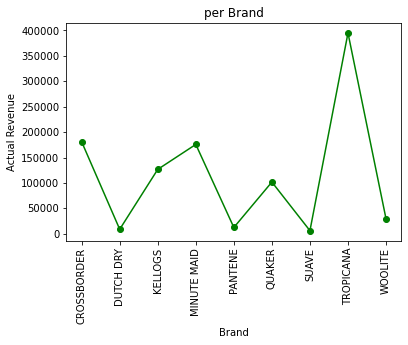

In [10]:
#generating sales by brand
SBB = pd.DataFrame(DS[['Brand','Actual Revenue']]).groupby('Brand').sum()#.sort_values('Actual Revenue',ascending=False)
#SBB

#Plotting graph
plt.plot(SBB.index,SBB["Actual Revenue"],color='Green', marker='o')
plt.title('per Brand')
plt.xlabel(SBB.index.name)
plt.ylabel('Actual Revenue')
plt.xticks(rotation=90)
plt.show()

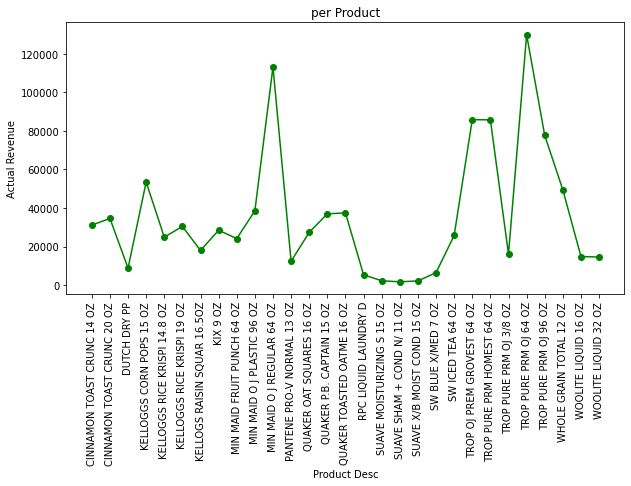

In [11]:
#generating sales by Product
SBP = pd.DataFrame(DS[['Product Desc','Actual Revenue']]).groupby('Product Desc').sum()#.sort_values('Actual Revenue',ascending=False)
#SBP

#Plotting graph
plt.figure(figsize=(10,5))
plt.plot(SBP.index,SBP["Actual Revenue"],color='Green', marker='o')
plt.title('per Product')
plt.xlabel(SBP.index.name)
plt.ylabel('Actual Revenue')
plt.xticks(rotation=90)
plt.show()



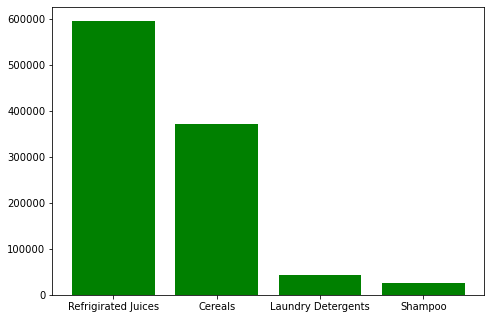

In [12]:
#generating sales by Product
SBC = pd.DataFrame(DS[['Category','Actual Revenue']]).groupby('Category').sum().sort_values('Actual Revenue',ascending=False)
#SBP

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(SBC.index,SBC["Actual Revenue"],color='Green')
plt.show()
